#### Eligibility traces calculation using both Forward view and Backward view in efficient way

In [228]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import time
import math

#### create random states and Temporal Difference Error

In [229]:
data_size = 50
States = np.arange(0,data_size)
Q = np.random.randint(0,10,[1,data_size+1])
reward = np.random.randint(0,2,[1,data_size])

In [230]:
lambda_return = 0.7
discount_factor = 0.9
Q[0,data_size] = 0

#### First calculate lambda return  value using Forward view which offline method 

In [231]:
R_lambda = np.zeros([1,data_size])

In [232]:
R_lambda[0,data_size-1] = reward[0,data_size-1]

for i in range(data_size-2,-1,-1):
    R_lambda[0,i] = reward[0,i] + discount_factor * (lambda_return * R_lambda[0,i+1] +(1-lambda_return)*Q[0,i+1])

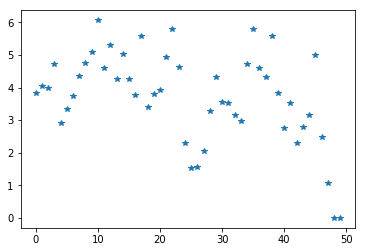

In [233]:
plt.plot(R_lambda[0,:],'*')
plt.show()

#### Now calculate same returns using Backward view

In [234]:
class Node:
    def __init__(self,States=None,reward=None,Q=None,value=0,Time=None,cache=0,repeat=None,Next=None):
        self.States = States
        self.reward = reward
        self.Q = Q
        self.value = value
        self.Time = Time
        self.cache = cache
        self.repeat = None
        self.next = Next

In [235]:
class Linklist:
    def __init__(self,head=None,tail=None):
        self.head = head
        self.tail = tail
    
    def insert(self,data):
        if not self.head:
            self.head = data
            self.tail = self.head
        else :
            self.tail.next = data
            self.tail = self.tail.next
    
    def delete(self):
        if self.head:
            if self.head == self.tail:
                self.head = None
                self.tail = None
            else:
                self.head = self.head.next
    def empty(self):
        if self.head == None and self.tail == None:
            return True

    def print_(self):
        temp = self.head
        while  temp:
            print(temp.States, end = "->")
            temp = temp.next

In [236]:
memory = Linklist()
length = -1
maximum_length = int(-2/math.log10(lambda_return))
j = 0
token = 0
for i in range(data_size+maximum_length):
    
    if i < data_size:
        #Append the state
        address = Node(States=States[i],Q=Q[0,i+1],reward=reward[0,i],Time=i)
        memory.insert(address)
        #increase the length of queue
        length = length + 1
        #calculate and set the Front node values
        memory.head.value = memory.head.value + ((discount_factor*lambda_return)**(length))*(reward[0,i]+ discount_factor*(1-lambda_return)*Q[0,i+1])   
        token = 0
    else :
        token = 1
    
    #Check for set the value
    if (length >= maximum_length or token) and  (not memory.empty()):
        #calculate value for next state
        next_state_lambda_reward = ((memory.head.value - memory.head.reward)/(lambda_return*discount_factor) )-(((1-lambda_return)* memory.head.Q)/(lambda_return))
        
        if memory.tail:
            #store the lambda return value in array
            R_lambda[0,j] = memory.head.value
        else :
            R_lambda[0,j] = memory.head.reward
        
        print(memory.head.value)
        #pop the states node out of queue
        memory.delete()
        length = length - 1
        
        if memory.tail:
            #store the value in the next state
            memory.head.value = next_state_lambda_reward
        
        j=j+1

3.8095954412875823
4.035325798454411
3.970021193293213
4.721707720374496
2.908528052871698
3.344405425286838
3.7251876411647293
4.33097207275889
4.7348681453379555
5.076183947491383
6.052859375684196
4.604193313981796
5.29764774389709
4.252345475819744
5.036524490086377
4.264324587438693
3.7708801481080005
5.56508372776768
3.394299194350875
3.806495061693913
3.9041631798024268
4.911370126670519
5.784174505411454
4.60522534063669
2.30139684314192
1.513320161818956
1.5573056729258594
2.0514734497007905
3.2584180247145063
4.323080357301817
3.562555973287564
3.5151600509390266
3.135174684030201
2.974003252522557
4.7277157142436845
5.794246866638701
4.60991566133127
4.31732644655757
5.567184835805666
3.820928310802643
2.7633782711153065
3.5291718589131853
2.300272791925691
2.794083796707446
3.1493393598530885
4.998951364846172
2.49039899181932
1.0799983997132059
-2.540137768791695e-06
-4.0319647123677694e-06


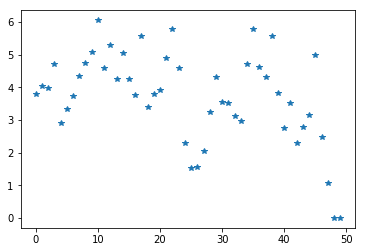

In [237]:
plt.plot(R_lambda[0,:],'*')
plt.show()